# Kapitel 1
Grundlagen Umgang mit Vektordaten.


Zunächst lernen wir Shapely kennen. Shapely basiert auf GEOS (Geometry Engine Open Source). Shapely wird in Zukunft auch durch "PyGEOS" ersetzt, die Syntax ist praktisch identisch.

In [2]:
from shapely.geometry import Polygon

polygon1 = Polygon([(30,10), (40,40), (20,35), (10,20), (30,10)])

print(polygon1.area)

475.0


Wir können nun das Polygon direkt im Jupyter Notebook anzeigen. Dies ist jedoch mit Vorsicht zu geniessen, da der Massstab bei dieser Anzeige nicht konstant ist.

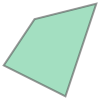

In [3]:
polygon1

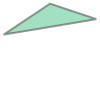

In [4]:
polygon2 = Polygon([(20,20),(80,30),(50,40),(20,20)])
polygon2

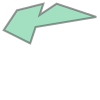

In [5]:
polygon1.union(polygon2)

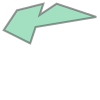

In [6]:
polygon2.union(polygon1)

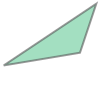

In [7]:
polygon1.intersection(polygon2)

In [8]:
resultat = polygon2.symmetric_difference(polygon1)

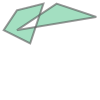

In [9]:
resultat

In [10]:
resultat.wkt

'MULTIPOLYGON (((20 20, 34.11764705882353 22.35294117647059, 30 10, 10 20, 20 35, 40 40, 37.14285714285715 31.42857142857143, 20 20)), ((37.14285714285715 31.42857142857143, 50 40, 80 30, 34.11764705882353 22.35294117647059, 37.14285714285715 31.42857142857143)))'

In [11]:
p = 'MULTIPOLYGON (((20 20, 34.11764705882353 22.35294117647059, 30 10, 10 20, 20 35, 40 40, 37.14285714285715 31.42857142857143, 20 20)), ((37.14285714285715 31.42857142857143, 50 40, 80 30, 34.11764705882353 22.35294117647059, 37.14285714285715 31.42857142857143)))'

In [12]:
import shapely.wkt

In [13]:
polygon3 = shapely.wkt.loads(p)

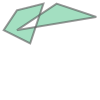

In [14]:
polygon3

In [15]:
polygon3.equals(polygon1)

False

## Vektordaten lesen

Zahlreiche Vektordaten-Formate lassen sich mit dem Modul "fiona" lesen. Mit fiona.supported_drivers können die unterstützen Formate angezeigt werden.
Wir benötigen geoutils.py im selben Ordner wie dieses Notebook (zu finden auf Moodle). 

Für die ersten Versuche verwenden wir Vektordaten aus dem Natural Earth Datensatz. (Public Domain)

In [16]:
import fiona

In [17]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SQLite': 'raw',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [18]:
import geoutils
import zipfile
import os

os.mkdir("geodata")
geoutils.download(geoutils.geodata["natural-earth"], "geodata/ne.gpkg.zip")
with zipfile.ZipFile("geodata/ne.gpkg.zip", 'r') as z:
    z.extractall("geodata")

FileExistsError: [WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'geodata'

In [19]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", 
            layer="ne_10m_airports")

In [20]:
airport = next(iter(c))

In [21]:
airport

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('scalerank', 9),
              ('featurecla', 'Airport'),
              ('type', 'small'),
              ('name', 'Sahnewal'),
              ('abbrev', 'LUH'),
              ('location', 'terminal'),
              ('gps_code', 'VILD'),
              ('iata_code', 'LUH'),
              ('wikipedia', 'http://en.wikipedia.org/wiki/Sahnewal_Airport'),
              ('natlscale', 8.0),
              ('comments', None),
              ('wikidataid', 'Q7399709'),
              ('name_ar', None),
              ('name_bn', None),
              ('name_de', None),
              ('name_en', 'Sahnewal Airport'),
              ('name_es', None),
              ('name_fr', 'aéroport de Sahnewal'),
              ('name_el', None),
              ('name_hi', 'सहेनवाल हवाई अड्डा'),
              ('name_hu', None),
              ('name_id', None),
              ('name_it', None),
              ('name_ja', None),
              ('name_ko', None),
  

In [22]:
airport['properties']['name_hi']

'सहेनवाल हवाई अड्डा'

In [23]:
c.close()

In [24]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", 
            layer="ne_10m_airports")


for airport in c:
    if airport['properties']['iata_code'] == "ZRH":
        print(airport)

c.close()

{'type': 'Feature', 'id': '824', 'properties': OrderedDict([('scalerank', 3), ('featurecla', 'Airport'), ('type', 'major'), ('name', "Zurich Int'l"), ('abbrev', 'ZRH'), ('location', 'terminal'), ('gps_code', 'LSZH'), ('iata_code', 'ZRH'), ('wikipedia', 'http://en.wikipedia.org/wiki/Z%C3%BCrich_Airport'), ('natlscale', 75.0), ('comments', None), ('wikidataid', 'Q15114'), ('name_ar', 'مطار زيورخ الدولي'), ('name_bn', 'জুরিখ বিমানবন্দর'), ('name_de', 'Flughafen Zürich'), ('name_en', 'Zurich Airport'), ('name_es', 'Aeropuerto Internacional de Zúrich'), ('name_fr', 'aéroport international de Zurich'), ('name_el', None), ('name_hi', None), ('name_hu', 'Zürichi repülőtér'), ('name_id', 'Bandar Udara Internasional Zürich'), ('name_it', 'aeroporto di Zurigo'), ('name_ja', 'チューリッヒ空港'), ('name_ko', '취리히 공항'), ('name_nl', 'Luchthaven Zürich'), ('name_pl', 'Port lotniczy Zurych-Kloten'), ('name_pt', 'Aeroporto de Zurique'), ('name_ru', 'Цюрих'), ('name_sv', 'Zürich flygplats'), ('name_tr', 'Zürih H

In [25]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", 
            layer="ne_10m_airports")

alles = list(c)

c.close()

In [26]:
len(alles)

893

In [27]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", 
            layer="ne_10m_airports")

for airport in c:
    geometry = airport["geometry"]["coordinates"]
    print()
    print(geometry)

c.close()


(75.95707224036518, 30.850359856170176)

(75.93305977107549, 17.625415183635024)

(85.3235970368767, 23.317724598996193)

(48.74710654359313, 31.343158556075725)

(78.21721865463483, 26.28548769793701)

(42.97109630194003, 14.755253441372462)

(75.8092915005895, 22.72774918757095)

(73.81056749246886, 19.966020567280626)

(76.80172611052417, 30.670724894966725)

(75.39584329220051, 19.867296962108234)

(72.9878190922305, 31.362743548086222)

(73.3163595376585, 54.95764829340594)

(82.66715245258652, 55.00958471362636)

(35.30187285752786, 47.873263557902284)

(101.44656929844086, 0.4646008729985052)

(145.24398029858185, 14.171771297121616)

(73.40849647643748, 61.340167219448126)

(78.7089578747476, 10.76035713065535)

(63.027933351918136, 25.988794590011004)

(66.94873114809494, 30.249043186181034)

(60.90070856491495, 29.475294195657344)

(112.71141861725775, -7.929980028405668)

(83.55045321240377, 53.3633850813046)

(75.75848284560045, 31.43294223977149)

(79.45200268765704, 28.4

In [28]:
c = fiona.open("geodata/packages/natural_earth_vector.gpkg", "r", 
            layer="ne_10m_admin_0_countries")

for country in c:
    if country["properties"]["NAME"] == "Switzerland":
        print(country["geometry"]["type"])
        #print(country["geometry"])

c.close()


Polygon
